# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2


## Actividad en clase

Usando el algoritmo **AdaBoost**, haga lo siguiente:

- Trabaje con las particiones training/testing del dataset **fetch_covtype**. Use 5000 muestras para training y 10000 para testing. Aplique un min_max scaler y luego un normalizer a los datos.
- Ajuste el clasificador **AdaBoost** sobre los datos usando como clasificador base árboles de decisión. Debe buscar exhaustivamente todas las posibles combinaciones de parámetros del algoritmo (T in {50, 100, 200, 500, 1000} y max_depth in {2, 3, 4, 5}).
- Evalúe el mejor modelo en la partición de testing mostrando la curva de error. Luego muestre el classification_report del clasificador.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que cada L es una décima más en la nota de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [1]:
from sklearn.datasets import fetch_covtype

X, y = fetch_covtype(return_X_y=True)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5_000, test_size=10_000, random_state=42)

In [3]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline

mm = make_pipeline(MinMaxScaler(), Normalizer())
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

range_T = [50, 100, 200, 500, 1000]

    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )
    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )
    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

For max_depth = 2 and t = 50 The accuracy is : 0.6601
For max_depth = 2 and t = 100 The accuracy is : 0.6534
For max_depth = 2 and t = 200 The accuracy is : 0.6566
For max_depth = 2 and t = 500 The accuracy is : 0.6306
For max_depth = 2 and t = 1000 The accuracy is : 0.6241
For max_depth = 3 and t = 50 The accuracy is : 0.5781
For max_depth = 3 and t = 100 The accuracy is : 0.5634
For max_depth = 3 and t = 200 The accuracy is : 0.5594
For max_depth = 3 and t = 500 The accuracy is : 0.5805
For max_depth = 3 and t = 1000 The accuracy is : 0.578
For max_depth = 4 and t = 50 The accuracy is : 0.6244
For max_depth = 4 and t = 100 The accuracy is : 0.648
For max_depth = 4 and t = 200 The accuracy is : 0.6531
For max_depth = 4 and t = 500 The accuracy is : 0.6441
For max_depth = 4 and t = 1000 The accuracy is : 0.6479
For max_depth = 5 and t = 50 The accuracy is : 0.6219
For max_depth = 5 and t = 100 The accuracy is : 0.6554
For max_depth = 5 and t = 200 The accuracy is : 0.6731
For max_depth

In [5]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

Text(0.5, 0, 'Number of Trees')

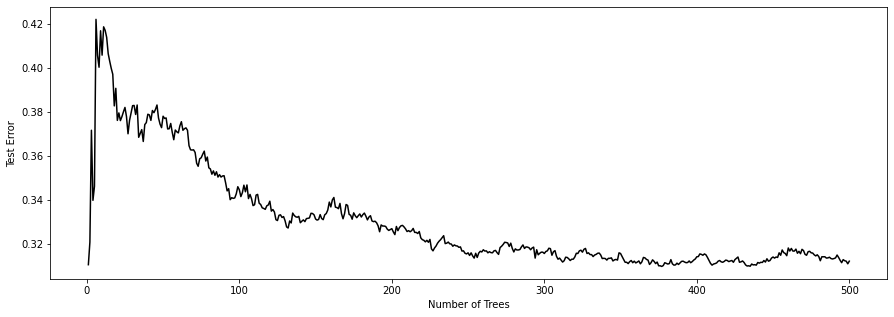

In [6]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

test_errors = []

for test_predict in clf.staged_predict(X_test):
    test_errors.append(1.0 - accuracy_score(test_predict, y_test))
    



plt.figure(figsize=(15, 5))

plt.plot(range(1, len(clf) + 1), test_errors, c="black")
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

In [7]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.70      0.67      3683
           2       0.72      0.71      0.72      4841
           3       0.75      0.77      0.76       623
           4       0.74      0.53      0.62        47
           5       0.72      0.17      0.28       160
           6       0.60      0.40      0.48       299
           7       0.70      0.52      0.60       347

    accuracy                           0.69     10000
   macro avg       0.70      0.55      0.59     10000
weighted avg       0.69      0.69      0.68     10000



Ver información del dataset en: https://archive.ics.uci.edu/ml/datasets/Covertype